<div style="text-align:center">
<h1>Visualising Data</h1>
<h2>7SSG2059 Geocomputation 2016/17</h2>
<h3>_Jon Reades_</h3>
</div>

## This Week’s Overview

This week we're going to explore how visualising data (using pandas and seaborn) helps us to make more sense of our data. We're then going to move on to automating this process because coding isn't _just_ about being able to load lots of data, it's also about being able to be constructively lazy with the data once it's loaded.

## Learning Outcomes

By the end of this practical you should:
- Have created a set of different plots using Seaborn
- Have automated the presentation of data for a number of columns
- Have grasped how a mix of graphs and numbers can help you make sense of your data

## Working through the Data

Last week you downloaded the `listings.csv` file since it's quite a bit smaller and easier to work with. Today, we're going to load the full data set, which contains 95 columns, instead of 'just' 16. This will allow us to investigate some of the metrics in more detail using graphical plots.

_Note:_ notice that there is a 'show archived data' link containing older data for each city on the [Get the Data](http://insideairbnb.com/get-the-data.html) page... think that could be useful for something???

In [3]:
import pandas as pd
df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/Data/LSOA%20Data.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types
print("Data frame shape: " + str(df.shape)) # What is the shape of the data?

Data frame shape: (4835, 43)


In [4]:
# Let's have a look at some data
df.head(2)

,Unnamed: 0,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,...,Sum Price,Mean Price,Median Price,Entire home/apt,Private room,Shared room,Small Host,Multiple Location Host,Property Count,Area
0,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,133320.768859
1,1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,...,2697.0,149.833333,117.5,12.0,5.0,1.0,13.0,5.0,18.0,226191.273063


In [11]:
# That looks like a lot of columns!
df.columns

Index([u'LSOA11NM', u'MSOA11CD', u'MSOA11NM', u'LAD11CD', u'LAD11NM',
       u'RGN11CD', u'RGN11NM', u'USUALRES', u'HHOLDRES', u'COMESTRES',
       u'POPDEN', u'HHOLDS', u'AVHHOLDSZ', u'geometry',
       u'Area that is Designated Greenspace',
       u'Area within 250m of M or A Roads', u'Owned',
       u'Shared ownership (part owned and part rented)', u'Social rented',
       u'Private rented', u'Living rent free',
       u'Occupancy rating (rooms) of -1 or less',
       u'Occupancy rating (bedrooms) of -1 or less',
       u'Average number of rooms per household',
       u'Average number of bedrooms per household', u'White',
       u'Mixed/multiple ethnic groups', u'Asian/Asian British',
       u'Black/African/Caribbean/Black British', u'Other ethnic group',
       u'Median Income', u'Sum Price', u'Mean Price', u'Median Price',
       u'Entire home/apt', u'Private room', u'Shared room', u'Small Host',
       u'Multiple Location Host', u'Property Count', u'Area'],
      dtype='object')

In [6]:
# Save this locally to avoid having to re-download it every time we start this notebook
df.to_csv('lsoa.csv.gz', compression='gzip', index=False)

# Delete the variable to avoid confusion later
del(df)

print("Done!")

Done!


Don't worry about the `index=False` parameter, but what do you think is going on with `compression='gzip'`? Can you find what _other_ options are supported for compression?

### Working with Really Big Data Sets

The London [InsideAirBnB data](http://insideairbnb.com/get-the-data.html) is nearly 50MB -- reading and loading that amount of data will slow things down quite a bit! Sometimes it's easier to work with only a portion of the data while we are doing our coding and then, once we know that we've written things correctly, we do our analysis on the whole data set. 

One way to achieve this right at the start is to specify the number of rows (abbreviated to `nrows`) that you want to load. Using our LSOA data set, for instance, do we really need to start out with all 4,300 rows? Or could we work with 'just' 2,000 to get things started? If we use functions to automate our analysis then the answer is: it doesn't matter!

In [16]:
df = pd.read_csv('lsoa.csv.gz', index_col=0, nrows=4835) # Try changing the nrows value
print(df.shape)
df.head(2)

(4835, 42)


,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,Sum Price,Mean Price,Median Price,Entire home/apt,Private room,Shared room,Small Host,Multiple Location Host,Property Count,Area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,133320.768859
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,2697.0,149.833333,117.5,12.0,5.0,1.0,13.0,5.0,18.0,226191.273063


You'll see a lot more with James in how to more effectively subset and sample data, but this should speed things up quite a bit until we're ready to deal with the whole data set!

**Q1.** Can you spot the difference between the output of the _original_ `df.head(2)` and the _new_ one that we just loaded? _Hint:_ we've added a new parameter _besides_ `nrows`. We'll be looking at this in more detail next week.

## Sorting Data

Let's start with some really obvious questions about the data. We looked at distributions and min/max issues using built-in pandas functions the previous week, but that doesn't tell us _which_ places are very expensive/large/whatever. 

One way that we can tackle that is to describe the data:

In [20]:
df['Mean Price'].describe()

count    4067.000000
mean       76.080286
std        51.979531
min         9.000000
25%        45.309524
50%        66.000000
75%        94.228448
max      1208.333333
Name: Mean Price, dtype: float64

Another way to 'sanity check' is to sort the data...

In [18]:
df.sort_values(by='Mean Price', ascending=False).head(5)[['Mean Price','LSOA11NM']]

,Mean Price,LSOA11NM
LSOA11CD,,
E01002611,1208.333333,Hounslow 024D
E01001313,1034.750000,Ealing 002D
E01003809,925.833333,Richmond upon Thames 005D
E01004745,645.967742,Westminster 021C
E01003377,500.000000,Merton 012C


That last command is actually quite complex, so let's take a second to unpack it:
```python
df.sort_values(by='Mean Price', ascending=False).head(5)[['Mean Price','LSOA11NM']]
```

1. Take the data frame `df`;
2. Sort it using the `Mean Price` column by descending order (_i.e._ `ascending=False`);
3. Take the first five values (`head(5)`);
4. And print out the columns specified by the list (`['Mean Price','LSOA11NM']`).

Let's pull it apart step-by-step at the code level:

* The first step in this process is `df.sort_values` -- you can probably guess what this does: it sorts the data frame!
* The parameters passed to the `sort_values(...)` function are `by`, which is the column on which to sort, and `ascending=False`, which gives us the data frame sorted in _descending_ order!
* The output of `df.sort(...)` is _itself_ a new data frame, which means that we can simply add `.head(5)` to get the first five rows of the newly-sorted data frame.
* And the output of `df.sort(...).head(...)` is yet _another_ data frame, which means that we can print out the values of selected columns using the 'dictionary-like' syntax: we use the outer set of square brackets (`[...]`) to tell pandas that we want to access a subset of the top-5 data frame, and we use the inner set of square brackets (`['Mean Price','LSOA11NM']`) to tell pandas which columns we want to see.

I'd say 'simples, right?' but that's obviously _not_ simple. It _is_, however, very, very _elegant_ because it's quite clear (once you get past the way that lots of commands can be chained together) and it's very succinct (we did all of that in _one_ line of code!).

**Q2.** Now, can you output the Mean and Median prices (as well as the LSOA11NM) for the 7 _cheapest (by median price)_ LSOAs?

In [19]:
df.sort_values(???).???

,Mean Price,Median Price,LSOA11NM
LSOA11CD,,,
E01003484,9.000000,9.0,Newham 032B
E01000192,12.000000,12.0,Barnet 018A
E01000083,28.000000,12.0,Barking and Dagenham 007F
E01002645,19.777778,13.0,Hounslow 015C
E01002642,13.000000,13.0,Hounslow 015A
E01001675,15.333333,13.0,Greenwich 006D
E01002648,32.916667,13.0,Hounslow 018C


If all has gone well (using the full data set) you should have:

| LSOACD | Mean Price | Median Price | LSOA11NM |
|--------|------------|--------------|----------|	
| E01003484 | 9.000000 | 9.0 | Newham 032B |
| E01000192 | 12.000000 | 12.0 | Barnet 018A |
| E01000083 | 28.000000 | 12.0 | Barking and Dagenham 007F |
| E01002645 | 19.777778 | 13.0 | Hounslow 015C |
| E01002642 | 13.000000 | 13.0 | Hounslow 015A |
| E01001675 | 15.333333 | 13.0 | Greenwich 006D |
| E01002648 | 32.916667 | 13.0 | Hounslow 018C |

## Working with a Data Series

Implicitly, we've already done quite a bit with the Series (i.e. column) class offered by pandas, but I want to revisit it so that you understand why getting to grips with how the series works (especially the 'index', which is a special type of series) is crucial to getting the most out of pandas.

The easiest way to think about this: a `Series` is just another name for a pandas column.

### Adding a New Series

You may recall that you can add a new series to an existing data frame using the dictionary-like syntax:
```python
df['<new series name>'] = pd.Series(... <series definition> ...)
``` 
But just to remind you: see how familiar that syntax is? `df['key'] = value` is _exactly_ like creating and assigning a new key/value pair to a dictionary called `df`! The only difference here is that the 'value' we store in the dictionary is a Series object, and not a simple variable (String, int, float).

Let's do this for the price so that we get a sense of how expensive a place is _relative_ to all other listings... Perhaps something like standard deviations from the mean?

In [21]:
df['score'] = pd.Series((df['Mean Price'] - df['Mean Price'].mean()) / df['Mean Price'].std())

In [22]:
df.score.describe()

count    4.067000e+03
mean     1.397674e-16
std      1.000000e+00
min     -1.290514e+00
25%     -5.919785e-01
50%     -1.939280e-01
75%      3.491406e-01
max      2.178267e+01
Name: score, dtype: float64

Again, let's step through the code to make sense of what we just did:
```python
series = pd.Series((df.price - df.price.mean()) / df.price.std())
```
That doesn't look _exactly_ the same, but that's only because our column name has a space in it ('Mean Price'). If it were 'mean_price' or, more simply, 'price' then we could use the easier-to-read syntax above.

Aaaaanyway:
1. `pd.Series(...)` creates a new pandas Series from whatever data we pass it;
2. `(df.price - df.price.mean())` does something really clever: it takes each _individual_ row value of the `price` column and _subtracts_ the average price of the entire column using `df.price.mean()`.
3. We then divide that by the standard deviation, which we just calculated for the _entire_ column using `df.price.std()`!

Doing this in Excel would be a bit more work and, more importantly, a _lot_ slower. This is especially true if what you want to do is get things working on a subset of the data _before_ analysing the entire data set in one go. Imagine doing this for 25,000,000 records and you begin to see how _scripability_ is incredibly useful here.

**Q3.** What's the statistical term for what we've just calculated?

### What's in a Score?

Do you remember any GCSE statistics? What this pandas command does:
```python
(df.price - df.price.mean()) / df.price.std()
```

...is standardisation (more on this near the end of term):

$$
z = \frac{x - \bar x}{\sigma}
$$

The number that we have now tells us how far from the _average_ price of properties in London _each_ individual property is as a multiple of the standard deviation. So something priced at the average would have a value of `0`, while the most expensive are many times that...

In [27]:
df.sort_values(by='score', ascending=False).sample(10)[['Mean Price','score','LSOA11NM']]

,Mean Price,score,LSOA11NM
LSOA11CD,,,
E01001125,NaN,NaN,Croydon 033E
E01001116,39.000000,-0.713363,Croydon 013F
E01003222,41.666667,-0.662061,Lewisham 022D
E01004161,84.500000,0.161981,Sutton 014E
E01002992,53.333333,-0.437614,Kingston upon Thames 010D
E01002416,30.000000,-0.886508,Hillingdon 008A
E01000162,78.666667,0.049758,Barnet 015E
E01002063,120.500000,0.854562,Haringey 036B
E01000469,NaN,NaN,Bexley 001D


**Q4.** Using the output of the `sample(10)` function can you guess about what the mean price of an Airbnb property in London might be?

Let's check:

In [28]:
df['Mean Price'].mean()

76.080286011816909

## Visualising Data

OK, we've added one useful new column (data series) to our data frame just to see how it's done, but now let's get down to some visualisation!

### Start with a Chart

If we weren't learning how to program at the same time as we learn to do data analysis then my recommendation would have been this: **start with a chart**. Of course, we mean start with a _good_ chart:

[![Do maps lie?](http://img.youtube.com/vi/hYaoE4Kh9fk/0.jpg)](http://www.youtube.com/watch?v=hYaoE4Kh9fk)

There is _no_ better tool for understanding what is going on in your data than to visualise it, but we couldn't show you how to make a plot without first teaching you how to load data and perform some basic operations on a data frame! 

Now that we've done *that*, we can get to grips with VDQI (the [Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi) and how this supports our understanding of the data.

### Why Seaborn?

We can do some straightforward plotting directly from pandas, but for the data visualisation part of the practical we are going to use the [Seaborn package](http://stanford.edu/~mwaskom/software/seaborn/) because it provides a lot of quite complex functionality (and very pretty graphs) at quite low 'cost' (_i.e._ effort). There are, however, other options out there that are worth checking out if you take things further; the two that you are most likely to hear mentioned are: [Bokeh](http://bokeh.pydata.org/en/latest/) and matplotlib. 

1. Bokeh is, like, Seaborn designed to make it easy for you to create good-looking plots with minimal effort. 
2. Matplotlib is a different beast: it is actually the _underlying_ package that supports the majority of plotting (drawing graphs) in Python. 

So Seaborn and Bokeh both make use of the matplotlib library to create their plots, and if you want to customise a figure from either of these two libraries then you will eventually need to get to grips with matplotlib. The reason we don't teach matplotlib directly is that it's much harder to make a good plot and the syntax is much more complex.

A more recent entrant is yhat's (a data science 'joke') ggplot library, which deliberately mimics R’s ggplot2 (http://ggplot.yhathq.com) -- this library has become the dominant way of creating plots in the R programming language and it uses a 'visualisation' grammar that many people find incredibly powerful and highly customisable. Unfortunately, ggplot on Python does not currently support mapping (which R does in ggplot2).

### Loading Seaborn 

As with other libraries that we’ve used, we’ll import Seaborn using an alias:
```python
import seaborn as sns
```
So to access Seaborn's functions we will now always just write `sns.<function name>()` (where `<function name>` would be something like `distplot`). 

### But First!

<span style=\"color:red;\">Important Note for Mac Users</span>

Recent changes in the way that the Mac OS handles the plotting of data means that you need to do certain things in a specific order at the start of any notebook in which you intend to show maps or graphs. Please make a copy of the following code for any notebook that you create and make it the _first_ code that you run in the notebook:

```python
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
```

For non-Mac users it _should_ be:
```python
%matplotlib inline
import matplotlib.pyplot as plt
```
This _should_ enable you to create plots, including in the practical that we're about to start! If you forget to run this code _before_ trying to use Seaborn then you will probably need to restart the Kernel (Kernel > Restart from the menu). If you do _that_ you will lose all of your 'live' work (_i.e._ variables, loaded modules, etc.).

The `%matplotlib inline` command only need to be run _once_ in a jupyter notebook; it tells jupyter to show the plots as part of the web page, rather than trying to show them in a separate window. So the easiest thing to do is just stick whatever code you need at the top of your notebook so that you _always_ run it once when you start up a notebook and can then forget about it.

In [29]:
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

/Applications/anaconda/envs/gsa2017/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Making a Distribution Plot

One of the most useful ways to get a sense of a data series is simply to look at its overall distribution. Something like this:
```python
sns.distplot(<data series>)
```

ValueError: cannot convert float NaN to integer

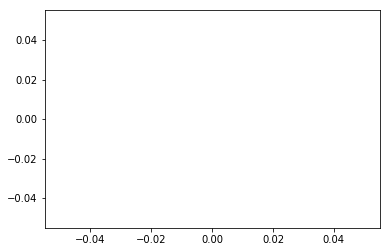

In [31]:
# Note the x-axis range
sns.distplot(df['Mean Price'], hist=False)
sns.distplot(df['Median Price'], hist=False)

In [ ]:
# Note the x-axis range!
sns.distplot(df.score, kde=False)

If all at went well you should see an 'ok' (kind of 'meh', really) distribution plot for the price! Let's try it *after* removing listings with z-scores greater than 8 instead!

In [ ]:
# Note the x-axis range!
# Note the switch from a histogram to a KDE
# What else can you do...
#?sns.distplot
sns.distplot(df.price[df.score.abs() < 5], hist=False, kde=True)

### Recap

OK, I want you to take a second here: although there was a lot of setup work that needed to be done, we just created a distribution plot in one line of code _after_ filtering out values that we felt were skewing our view of the data. _One line_. This is a more sophisticated plot than you could ever create in Excel and you just created it in one line of code!

Let's review:
```python
sns.distplot(df.price[df.score.abs() < 5])
```
We are:
1. Creating a seaborn distribution plot (`sns.distplot(...)`)
2. Using the price column (`df.price`)
3. But first selecting only those data where the absolute value of the standard deviation was less than 8 (`df.stdev.abs() < 5`).

You'll notice too that list-type syntax: `df.price[...]` which tells us that we're selecting elements of the list in the same way that we selected column names above.

## Automation

Try producing similar plots for some of the other groups. You should be able to do this using two things:
* A `for` loop to iterate over the column names
* String interpolation to access the column in the data frame

How about we try: `'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'weekly_price'`?

I'll get you started... this also demonstrates how we can use pandas' dictionary-style notation to create a new string that we can then use as a key for a new data series.

In [ ]:
for c in ???:
    plt.figure() # Create a new figure so they don't over-print
    sns.distplot(df[???], hist=False)

You should have 5 charts and an error. 

**Q4.** Which column failed to plot and why? How would you fix it?

And did you notice how we turned off the histogram (which would have been confusing with 8 overlapping plots) using the `hist=False` option? More on this, as always, using `help(sns.distplot)` or [RTM](https://seaborn.github.io).

In [ ]:
# Fix the error using this coding area
# and copy+paste the for loop as well to
# test that you've corrected it

## Saving a Plot

But... wouldn’t be it a lot easier if we could save our plot automatically and not have to even touch a button to do so? This is where we need to use matplotlib syntax (and where you'll see why we opted not to spend too much time on it):

```python
series = df.price 
fig = plt.figure(series.name)
sb.distplot(series)
fig = plt.gcf()
plt.savefig("{0}-Test.pdf".format(series.name), bbox_inches="tight")
plt.close()
```

To explain what's happening here: 

1. We import a sub-package of `matplotlib` that gives us access to all kind of useful functions (We've actually done this already, which is why this line is commented out).
2. We copy the price data series to a new variable (this would mean that, to print out weekly_price or monthly_price we'd only have to change this one line... see: we're preparing to use a `for` loop!)
3. We create a `figure` object into which Seaborn can 'print' its outputs.
4. We call Seaborn and ask it to print (it doesn't really need to know that it's printing to something, it just nees to know what 'device' is should use for output).
5. We save the plot, using the `format` command to replace the `{0}` with the name of the data series (so in this example we'd be saving our figure to `price-Test.pdf`).
6. We then close the figure output so that we don't print other plots over top of it -- that's what happened in the earlier code when we used the `for` loop!
 
The plot should have been saved to your working directory (where the Jupyter notebook is running) using the name of the data series that you were working with. We want to use string replacement (the `{0}`) so that when we save the plot for weekly_price or monthly_price we don't overwrite the one for price!

Let's try saving the square footage data!

In [ ]:
series = ???                  # Copy the square footage data series to a new variable
fig = plt.figure(series.name) # Create a figure using a title based on the series name
sns.distplot(series)          # Plot the series to the open 'figure' device
fig = plt.gcf()               # *G*et the *C*urrent *F*igure environment so that the next command works
plt.savefig("{0}-Test.pdf".format(series.name), bbox_inches="tight")
plt.close()                   # Close the plot so that nothing else overwrites our work

## Automation with Loops & Functions

When we're undertaking an analysis of a data set, we often have to perform the same (or at least similar) tasks for each weather station or socio-economic class or ethnic group. We *could* copy and paste the code, and then just change the variable names to update the analysis... but that would be a definite instance of what Larry Wall would have called 'false laziness': it seems like a time-saving device in the short run, but in the long run you've made your code less readily maintainable (what if you want to _add_ to your analysis or find a bug?) and less easy to understand.

There are nearly always two things that you should look at if you find yourself repeating the same code: 
1. write a for loop; 
2. consider writing a function.

**Q5.** Why do you think that we use these two strategies?

### Using a For Loop

Let’s start with a for loop to generate summary statistics for several of our data columns -- you’ve already typed all of this code more than once so all we need to do is take the right bits of it and put them in a for loop like this:
```python
for c in ...:
    series = df[c] # Get the series
    print('Sumarising ' + series.name)
    print("\tMean:    {0:> 9.2f}".format(series.mean()))
    print("\tMedian:  {0:> 9.2f}".format(series.median()))
```
 
All you need to do is figure out which data series go into the for loop in the first place and then your code will run for each one, producing a nicely formatted summary for each... we hope!

In [ ]:
for c in df.columns:
    series = df[c]
    print('Sumarising ' + series.name)
    print("\tMean:    {0:> 9.2f}".format(series.mean()))
    print("\tMedian:  {0:> 9.2f}".format(series.median()))

However, as you've just now discovered you can't do this for every column because not every one is numeric, so it's time to introduce a useful little 'emergency' handler for what Python calls '[exceptions](https://docs.python.org/2/tutorial/errors.html)':

In [ ]:
for c in df.columns[56:62]: # Notice that we start with some testing!!!
    series = df[c]
    print('Summarising ' + series.name)
    try:              # Try to do something
        print("\tMean:    {0:> 9.2f}".format(series.mean()))
        print("\tMedian:  {0:> 9.2f}".format(series.median()))
    except TypeError: # If you see this problem don't blow up please!
        print("\tData cannot be summarised numerically.")

Compare that output with the output below and then answer this question:

**Q6.** Why do we see the output for columns like `host_is_superhost` 'twice' even though we don't expect it?

In [ ]:
for c in df.columns[56:62]:
    series = df[c]
    try:              # Try to do something
        print('Summarising ' + series.name)
        print("\tMean:    {0:> 9.2f}".format(series.mean()))
        print("\tMedian:  {0:> 9.2f}".format(series.median()))
    except TypeError: # If you see this problem don't blow up please!
        print("Series " + series.name + " cannot be summarised numerically.")

So what the `except` does is allow us to intercept the error _before_ Python simply gives up and throws an error at you. For automation this is a really useful feature since it allows us to figure out if there are problems and do something about them before the user is left trying to figure out what went wrong! You should read up on these as they are very useful!

### Adding Graphs

OK, so now we've got the `for` loop working and can handle issues relating to whether or not the column is actually numeric. So we've solved _one_ part of the problem. We can now move on to the _next_ part of the problem: creating a chart from each of the numeric columns.

To help us make sense of the data it will be useful to add some additional information to our distribution plots: lines to show the location of the mean, median, and outlier thresholds.

To do this, we need to get at the library that Seaborn itself uses: `matplotlib`.

In [ ]:
# Setup work -- enables parameterisation
series = df.price[df.score.abs() <= 6]
fig = plt.figure(series.name)

# Create the plot
d    = sns.distplot(series)
# Find the limits
ymin = d.get_ylim()[0]
ymax = d.get_ylim()[1]

# Now add mean and median
plt.vlines(series.mean(), ymin, ymax, colors='red', linestyles='solid', label='Mean')
plt.vlines(series.median(), ymin, ymax, colors='green', linestyles='dashed', label='Median')

# Add outlier marks (more than 1.5 times the IQR above or below the 1st and 3rd quartiles)
iqr = series.quantile(0.75)-series.quantile(0.25)
if series.quantile(0.25)-1.5*iqr > 0:
    plt.vlines(series.quantile(0.25)-1.5*iqr, ymin, ymax, colors='blue', linestyles='dotted', label='Lower Outlier')
if series.quantile(0.75)+1.5*iqr > 0:
    plt.vlines(series.quantile(0.75)+1.5*iqr, ymin, ymax, colors='blue', linestyles='dotted', label='Upper Outlier')


In [ ]:
# What just happened???
?plt.vlines

Remember that you can also type `help(plt.vlines)` to discover what parameters a function takes. 

**Q7.** Why do you think I put an `if` condition on the outlier lines? Would this always be appropriate? Why? Why not?

### Creating a Function

Now that we've got the figure looking right for _one_ column, why don't we try to create a useful _function_ -- we _can_ always do this directly within the `for` loop, but a function is more elegant since it makes it simpler to see what is going on. I've created the basics of the function for you to illustrate this, but you'll need to do some extra legwork to figure out how to print out all of your graphs and summaries.

In [ ]:
df.bed_type.min()

In [ ]:
def create_plot(s):

    fig = plt.figure(s.name)

    # Create the plot
    d    = sns.distplot(s.dropna())
    # Find the limits
    ymin = d.get_ylim()[0]
    ymax = d.get_ylim()[1]

    # Now add mean and median
    plt.vlines(s.mean(), ymin, ymax, colors='red', linestyles='solid', label='Mean')
    plt.vlines(s.median(), ymin, ymax, colors='green', linestyles='dashed', label='Median')

    # Add outlier marks (more than 1.5 times the IQR above or below the 1st and 3rd quartiles)
    iqr = s.quantile(0.75)-series.quantile(0.25)
    if s.quantile(0.25)-1.5*iqr > 0:
        plt.vlines(s.quantile(0.25)-1.5*iqr, ymin, ymax, colors='blue', linestyles='dotted', label='Lower Outlier')
    if s.quantile(0.75)+1.5*iqr > 0:
        plt.vlines(s.quantile(0.75)+1.5*iqr, ymin, ymax, colors='blue', linestyles='dotted', label='Upper Outlier')

    fig = plt.gcf() # *G*et the *C*urrent *F*igure environment so that the next command works
    plt.savefig("{0}-Automated.pdf".format(s.name), bbox_inches="tight")
    plt.close() 

for c in df.columns[56:62]:
    series = df[c]
    print('Summarising ' + series.name)
    try:              # Try to do something
        
        # Print numerical summaries
        print("\tMin:     {0:> 9.2f}".format(series.min()))
        print("\tMax:     {0:> 9.2f}".format(series.max()))
        print("\tMean:    {0:> 9.2f}".format(series.mean()))
        print("\tMedian:  {0:> 9.2f}".format(series.median()))
        print("\tIQR:     {0:> 9.2f}".format(series.quantile(0.75)-series.quantile(0.25)))
        
        # Create graphical summary
        print("\tCreating graph...")
        create_plot(series)
        
    except TypeError: # If you see this problem don't blow up please!
        print("\tData cannot be summarised numerically.")
    ???: # Fix the error from bed_type, amenities, etc.
        print("\tProblem formatting string.")

## Other Types of Plots

Using our data frame, let’s have a look at some other types of plots... We're also going to be playing with [aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) that change how your plot looks:

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,10))
b = sns.boxplot(ax=ax, 
        x='neighbourhood_cleansed', 
        y='price', 
        data=df.sort_values(by='price'), 
        palette='PRGn', 
        fliersize=4, 
        linewidth=1)
plt.ylim(0, 800)
sns.despine(offset=10, trim=True)
for item in b.get_xticklabels():
    item.set_rotation('vertical')
plt.title("Price Distribution")

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,10))
b = sns.violinplot(ax=ax, 
        x='neighbourhood_cleansed', 
        y='price', 
        data=df.sort_values(by='price'), 
        palette='PRGn', 
        fliersize=4, 
        linewidth=1)
plt.ylim(0, 800)
sns.despine(offset=10, trim=True)
for item in b.get_xticklabels():
    item.set_rotation('vertical')
plt.title("Price Distribution")

In [ ]:
sns.regplot(x='price', y='square_feet', data=df)

In [ ]:
sns.lmplot(x='price', y='bedrooms', col='neighbourhood_cleansed', data=df,
          col_wrap=3, ci=None, palette='muted', size=4, 
          scatter_kws={'s':50, 'alpha': 1})

In [ ]:
sns.jointplot(df.bedrooms, df.bathrooms, color='#4CB391')

In [ ]:
sns.jointplot(df.longitude, df.latitude, color='#4CB391')
# Why might this 'map' not look right? 

## 3D Plots
Finally, I wanted to show you how to create a 3D scatter plot – in this case the plot doesn’t add a lot to our understanding of the data, but there are cases where it might and it does illustrate how pandas, seaborn, and matplotlib work together to produce some pretty incredible outputs.
  
I would encourage you to look into the options in more detail:
* Can you change the colour map used to indicate which neighbourhood each listing is drawn from?
* Can you change the icons used to mark each neighbourhood so that they are different?
* Can you add a legend to indicate which marker is for which area?

On with the show!

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colours 
import matplotlib.cm as cmx

# Set up the figure
w, h = 12, 8
fig = plt.figure(figsize=(w, h))
ax  = fig.add_subplot(111, projection='3d')

# Set up the 3D axes
x = df.latitude
y = df.longitude
z = df.price

# Set up the colourmap so that we see
# different colours for each borough's
# data.
# From: http://stackoverflow.com/questions/28033046/matplotlib-scatter-color-by-categorical-factors
boroughs  = list(set(df.neighbourhood_cleansed)) 
hot       = plt.get_cmap('hot')
cNorm     = colours.Normalize(vmin=0, vmax=len(boroughs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

for i in xrange(len(boroughs)):
    indx = df.neighbourhood_cleansed==boroughs[i]
    ax.scatter(x[indx], y[indx], z[indx], c=scalarMap.to_rgba(i), marker='.')

ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.set_zlabel(z.name)

# Finally!

Now redo all of this with the _full_ data set!

In [ ]:
# Copy+paste code to here that you need to run the analysis
# using the full data set (including outputing of charts and
# summary stats) in one go. This will test if you reall 'got'
# the hang of what we've done. You should also restart the 
# kernel to clear the existing variables from memory:
#    Kernel > Restart [Note: not Restart & Clear Output]

In [ ]:
# Set the display format of numbers from scientific
pd.set_option('display.float_format', lambda x: '%.3f' % x)